### Load libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.io import arff
import os
from sklearn.preprocessing import Imputer
from scipy.stats import skew

### Load Data

I used the “arff” library to load the data for 3 years of polish companies bankruptcy data. 

In [2]:
os.chdir('/Users/drazenzack/Desktop/data_1')
df3 = arff.loadarff('3year.arff')
df2 = arff.loadarff('2year.arff')
df1 = arff.loadarff('1year.arff')
year3 = pd.DataFrame(df3[0])
year2 = pd.DataFrame(df2[0])
year1 = pd.DataFrame(df1[0])

### Data Preprocessing

Three separate years of data were merge together to create a new data frame. A count of the target variable was conducted to see that there is an imbalance in the variable. 

In [3]:
### Merge Data
df = pd.concat([year1, year2, year3], 0)
df = df.reset_index()
df.drop('index', axis = 1, inplace = True)
df.rename(columns={'class':'target'}, inplace=True)
df.replace({'target': b'1'}, int(1), inplace=True)
df.replace({'target': b'0'}, int(0), inplace=True)
df['target'].value_counts()

0    26537
1     1166
Name: target, dtype: int64

#### Remove Duplicates

A check to see if there were any duplicates was done. Results showed 518 duplicates. These duplicates were removed from the data set. 

In [4]:
duplicates = df[df.duplicated(keep = False)]
print('Records in dataset:',len(df))
print('Number of duplicates in Dataset:',len(duplicates))
df.drop_duplicates(inplace=True)
print('Number of duplicates after droping duplicates:', len(df[df.duplicated(keep = False)]))
print('Records in dataset after droping duplicates:',len(df))


Records in dataset: 27703
Number of duplicates in Dataset: 518
Number of duplicates after droping duplicates: 0
Records in dataset after droping duplicates: 27444


#### Count NaNs by Columns

A check  was done to see if there were any “NaN” values. Results showed that all columns had “NaN” values but the target variable.

In [5]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
na_columns = pd.DataFrame(df.isnull().sum(), columns = ['Count'])
print(na_columns)

        Count
Attr1       4
Attr2       4
Attr3       4
Attr4      69
Attr5      57
Attr6       4
Attr7       4
Attr8      56
Attr9       8
Attr10      4
Attr11     40
Attr12     69
Attr13    105
Attr14      4
Attr15     22
Attr16     57
Attr17     56
Attr18      4
Attr19    106
Attr20    105
Attr21   5575
Attr22      4
Attr23    105
Attr24    576
Attr25      4
Attr26     57
Attr27   1725
Attr28    469
Attr29      4
Attr30    105
Attr31    105
Attr32    225
Attr33     69
Attr34     56
Attr35      4
Attr36      4
Attr37  11897
Attr38      4
Attr39    105
Attr40     69
Attr41    483
Attr42    105
Attr43    105
Attr44    105
Attr45   1255
Attr46     70
Attr47    189
Attr48      5
Attr49    105
Attr50     56
Attr51      4
Attr52    189
Attr53    469
Attr54    469
Attr55      1
Attr56    105
Attr57      3
Attr58     67
Attr59      3
Attr60   1259
Attr61     54
Attr62    105
Attr63     69
Attr64    469
target      0


#### Fill in NaN's with Column Median

Instead of just removing all rows with “NaN”, the median was taken for each column and placed in the spot of the “NaN” value. 

In [6]:
im = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
im = im.fit(df)
im_df = im.transform(df.values)
im_df
df_clean = pd.DataFrame(im_df, columns = df.columns) 
na_columns2 = pd.DataFrame(df_clean.isnull().sum(), columns = ['Count'])
print(na_columns2)

/anaconda3/envs/coding/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


        Count
Attr1       0
Attr2       0
Attr3       0
Attr4       0
Attr5       0
Attr6       0
Attr7       0
Attr8       0
Attr9       0
Attr10      0
Attr11      0
Attr12      0
Attr13      0
Attr14      0
Attr15      0
Attr16      0
Attr17      0
Attr18      0
Attr19      0
Attr20      0
Attr21      0
Attr22      0
Attr23      0
Attr24      0
Attr25      0
Attr26      0
Attr27      0
Attr28      0
Attr29      0
Attr30      0
Attr31      0
Attr32      0
Attr33      0
Attr34      0
Attr35      0
Attr36      0
Attr37      0
Attr38      0
Attr39      0
Attr40      0
Attr41      0
Attr42      0
Attr43      0
Attr44      0
Attr45      0
Attr46      0
Attr47      0
Attr48      0
Attr49      0
Attr50      0
Attr51      0
Attr52      0
Attr53      0
Attr54      0
Attr55      0
Attr56      0
Attr57      0
Attr58      0
Attr59      0
Attr60      0
Attr61      0
Attr62      0
Attr63      0
Attr64      0
target      0


### EDA

#### Count of Target Variable 

The bar chart shows that there is a big difference in the levels for the target variable. This could be a problem down the road when modeling for classification. 

0.0    26282
1.0     1162
Name: target, dtype: int64

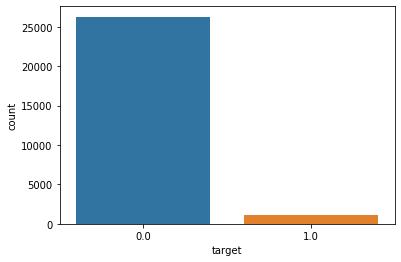

In [7]:
sns.countplot(df_clean.target, label = "Count")
df_clean.target.value_counts()

### High Correlation Variables

From looking at the top 10 highest correlated variables, there seems to be many highly correlated variables. If Logistic regression was chosen as the model technique this could become a problem.

In [8]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
print('Correlation Greater Than 0.8')
get_top_abs_correlations(df_clean,10)

Correlation Greater Than 0.8


Attr7   Attr14    1.000000
Attr4   Attr46    0.999916
Attr20  Attr56    0.999907
Attr10  Attr38    0.999901
Attr19  Attr31    0.999824
Attr43  Attr44    0.999776
Attr19  Attr23    0.999697
Attr53  Attr54    0.999595
Attr23  Attr31    0.999525
Attr8   Attr17    0.999162
dtype: float64

#### Summary Statistics

In [9]:
df_clean.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
count,27444.000000,27444.000000,27444.000000,27444.000000,2.744400e+04,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,2.744400e+04,27444.000000,27444.000000,27444.000000,27444.000000,2.744400e+04,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,2.744400e+04,27444.000000,27444.000000,27444.000000,27444.000000,2.744400e+04,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,2.744400e+04,2.744400e+04,27444.000000,27444.000000,2.744400e+04,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,27444.000000,2.744400e+04,2.744400e+04,27444.000000,2.744400e+04,27444.000000,2.744400e+04,27444.000000,2.744400e+04,27444.000000,27444.000000,27444.000000
mean,0.053664,0.616500,0.091843,5.991705,-6.354564e+02,-0.073594,0.156702,10.522444,3.026919,0.694479,0.188360,1.463553,1.051384,0.156709,1.834662e+03,1.732712,11.722971,0.160906,0.266055,3.482699e+02,4.566473,0.164443,0.258191,0.309804,0.407215,1.580685,1.174656e+03,4.845649,3.988367,9.515227,0.271718,1.248579e+03,8.785994,5.677064,0.156834,3.266074,63.946057,0.789925,-0.079805,1.812461,11.189372,-0.091283,1.396730e+03,1.048434e+03,6.744382,5.096809,4.919469e+02,0.072812,-0.563331,5.769883,0.502324,6.461412,32.280332,33.009113,6.930179e+03,-4.100645e+01,0.028801,4.678112e+01,1.733496,4.470619e+02,15.495428,1.589550e+03,9.648858,85.505594,0.042341
std,1.883338,6.273148,6.250680,325.294355,7.578004e+04,6.630136,5.703725,442.504206,74.855726,17.063258,5.930096,70.516442,105.834658,5.703725,8.556671e+04,70.074982,445.031184,5.724927,59.151884,4.714747e+04,263.427312,5.778786,58.943319,7.885613,13.564992,68.515658,3.827236e+04,97.803850,0.805482,1002.331023,59.229010,1.130485e+05,135.462562,140.434363,5.410476,74.722766,2776.189869,17.062123,17.773419,38.588241,1743.257302,18.176397,1.838316e+05,1.368048e+05,1992.535167,325.195491,4.149734e+04,5.334669,55.905879,343.289973,6.253707,598.353865,1503.969346,1511.053881,6.556030e+04,6.690409e+03,13.926933,6.702156e+03,152.709484,2.689067e+04,229.141271,1.602805e+05,143.937625,2763.197811,0.201369
min,-256.890000,-72.162000,-479.960000,0.000000,-1.190300e+07,-508.410000,-189.560000,-141.410000,-1.215700,-479.910000,-189.450000,-1543.800000,-1317.600000,-189.560000,-5.611900e+06,-214.670000,-0.412920,-189.560000,-1325.600000,-1.438600e-03,-1325.000000,-216.800000,-1325.600000,-189.560000,-500.930000,-214.670000,-1.901300e+05,-3829.900000,-0.886060,-6351.700000,-1325.600000,-9.295600e+03,-19.197000,-1696.000000,-169.470000,-0.000857,-525.520000,-479.910000,-1395.800000,-101.270000,-1234.400000,-1395.800000,-4.853200e+04,-4.853200e+04,-256230.000000,-101.260000,-9.611000e+01,-218.420000,-9001.000000,0.000000,0.000000,-25.467000,-3828.900000,-3828.900000,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,0.000000e+00,-6.590300,-2.336500e+06,-0.367890,-10677.000000,0.000000
25%,0.004100,0.275062,0.017886,1.043075,-4.926500e+01,0.000000,0.007087,0.421030,1.024300,0.290403,0.018379,0.017882,0.024960,0.007087,2.218775e+02,0.077495,1.440600,0.007087,0.004574,1.491850e+01,0.927400,0.000000,0.002789,0.029295,0.148097,0.070357,1.270775e-01,0.037415,3.493500,0.082444,0.008092,4.571300e+01,2.885150,0.330290,0.008026,1.139875,2.374075,0.417195,0.005239,0.053510,0.027462,0.000000,6.430150e+01,3.356750e+01,0.032383,0.596550,1.581900e+01,-0.036481,-0.024004,0.766535,0.193725,0.125040,0.682570,0.959353,2.135875e+01,

#### Skewness of Variables

The majority of the variables are highly skewed which could cause a problem when modeling with some classification techniques.

In [10]:
df_clean.skew()

Attr1     -92.843423
Attr2      71.326290
Attr3     -72.012928
Attr4     161.626330
Attr5    -143.280171
Attr6     -59.667700
Attr7      78.186374
Attr8      88.854565
Attr9      97.012835
Attr10     42.590940
Attr11     79.191537
Attr12     97.216373
Attr13    102.181270
Attr14     78.186377
Attr15     53.843330
Attr16     99.634306
Attr17     87.738125
Attr18     77.393711
Attr19    139.836939
Attr20    165.572329
Attr21    100.041253
Attr22     82.498013
Attr23    141.252914
Attr24     74.566554
Attr25     48.694418
Attr26    104.983531
Attr27     72.792185
Attr28     55.989645
Attr29     -0.045569
Attr30    137.993883
Attr31    139.909392
Attr32    139.681406
Attr33    155.200039
Attr34    142.457247
Attr35     84.301275
Attr36     97.487047
Attr37    117.361074
Attr38     42.585835
Attr39     40.457863
Attr40     92.467074
Attr41    165.623321
Attr42     35.395003
Attr43    164.692181
Attr44    163.988316
Attr45    -61.484329
Attr46    161.780579
Attr47    126.919905
Attr48     78

### K-Nearest Neighbor

After splitting and scaling the data, the count of the target variables shows that there is a big difference between the number of one’s and the number of zero’s. This could become a problem. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

df_clean2 = shuffle(df_clean)
df_clean2 = df_clean2.reset_index()
df_clean2.drop('index', axis = 1, inplace = True)

X = df_clean2.drop('target', axis = 1)
y = df_clean2[['target']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train_scaled_1 = sc.fit_transform(X_train)
X_test_scaled_1 = sc.transform(X_test)
##################################
### Count of Target by train and test data
from collections import Counter
print('Y Train:', Counter(y_train["target"]))
print('Y Test:', Counter(y_test["target"]))

Y Train: Counter({0.0: 21039, 1.0: 916})
Y Test: Counter({0.0: 5243, 1.0: 246})


#### Grid Search for K

A grid search was conducted to see what the best value for K is. The search used stratified K-fold cross validation to give the number for K that has the best accuracy.  

In [12]:
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold
params = {'n_neighbors' : [1,2,3,4,5,6,7,8,9]}
knn = KNeighborsClassifier()
gs1 = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy', cv = StratifiedKFold(n_splits = 5, random_state=0), n_jobs =1)
gs1.fit(X_train_scaled_1, y_train)
print(gs1.best_params_)

{'n_neighbors': 8}


In [13]:
Score1 = pd.DataFrame(gs1.cv_results_)
Score1[['param_n_neighbors', 'mean_test_score']]

,param_n_neighbors,mean_test_score
0,1,0.926167
1,2,0.955637
2,3,0.951993
3,4,0.957550
4,5,0.956639
5,6,0.957732
6,7,0.957504
7,8,0.958096
8,9,0.958051


In [14]:
gs_best1 = gs1.best_estimator_
skf = StratifiedKFold(n_splits=5, random_state=0)
new_scores = cross_val_score(gs_best1, X_train_scaled_1, y_train, cv=skf ,scoring = 'accuracy')
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Cross-validation accuracy score (with optimized parameters) = 0.958 (+/- 0.00045)


In [15]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix,classification_report
def model_info(x, y):
    cm = confusion_matrix(x,y)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    acc = accuracy_score(x,y)
    pre = precision_score(x,y)
    pre_0 = precision_score(x,y, pos_label= 0)
    rec = recall_score(x,y)
    rec_0 = recall_score(x,y, pos_label=0)
    f1 = f1_score(x,y)
    f1_0 = f1_score(x,y, pos_label= 0)
    fnr = 1 - rec_0
    fpr = 1 - rec
    data = [{"Accuracy":acc ,"NPV":pre, "PPV":pre_0,"Specificity":rec, "Sensitivity":rec_0, "F1 Score 1":f1, "F1 Score 0":f1_0, 'False Negative Rate': fnr , 'False Postive Rate':fpr}]
    df = pd.DataFrame(data)
    return (df)

In [16]:
model = KNeighborsClassifier( n_neighbors=8, metric='minkowski')
model.fit(X_train_scaled_1, y_train)
y_pred = model.predict(X_test_scaled_1)
res = model_info(y_test, y_pred)

#### Confusion Matrix

The confusion matrix shows that the model is not good at predicting one’s because it never once predicted a one. This could come from the imbalanced data set.

- 0 is postive
- 1 is negative

Text(24.0, 0.5, 'Actual')

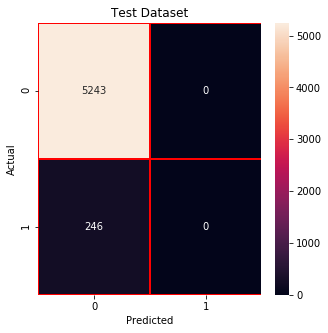

In [17]:
cm = confusion_matrix(y_test, y_pred)
f , ax =  plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Test Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### Model Metrics

The model metrics also show that the model for the most part only predicted zeros. The PPV and accuracy for this model shows that when only predicting zero you can be right around 95% of the time.  

In [18]:
res

,Accuracy,NPV,PPV,Specificity,Sensitivity,F1 Score 1,F1 Score 0,False Negative Rate,False Postive Rate
0,0.955183,0.0,0.955183,0.0,1.0,0.0,0.977078,0.0,1.0


#### ROC Plot

The ROC plot and the AUC shows that this model is just better than a random guess. A guess would be an AUC of 0.5, which this model is just better than. 

Text(0, 0.5, 'True Postive Rate')

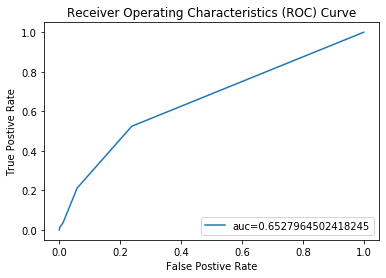

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba1 = model.predict_proba(X_test_scaled_1)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba1)
auc2 = auc(fpr,tpr)
##auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label = "auc="+str(auc2))
plt.legend(loc=4)
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')

### Under Sampling KNN

##### Under Sampling

There are many ways to handle a classification problem that is imbalance, from up sampling the minority class, under sampling the majority class, and adding weights to the classes. For this model under sampling was done on the majority class to go from around 26,000 to 4,000. This number was chosen because it creates a more balance dataset but also shows that zeros are happening more than a one outcomes. When under sampling the majority class, the model is losing some information about the zero’s which will cause a larger variance. 

In [20]:
df_0 = df_clean2[df_clean2['target'] == 0]
df_1 = df_clean2[df_clean2['target'] == 1]
df_under = df_0.sample(4000 ,random_state=19)
df_new = pd.concat([df_under, df_1], axis = 0)
############################
df_new = df_new.reset_index()
df_new.drop('index', axis = 1, inplace = True)
df_new["target"].value_counts()

0.0    4000
1.0    1162
Name: target, dtype: int64

In [21]:
X = df_new.drop('target', axis = 1)
y = df_new[['target']]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y, test_size = 0.2, random_state = 0)
#################################
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_1)
X_test_scaled = sc.transform(X_test_1)
###############################
from collections import Counter
print('Y Train:', Counter(y_train_1["target"]))
print('Y Test:', Counter(y_test_1["target"]))

Y Train: Counter({0.0: 3196, 1.0: 933})
Y Test: Counter({0.0: 804, 1.0: 229})


#### Grid Search for K

A grid search was conducted to see what the best value for K is. The search used stratified K-fold cross validation to give the number for K that has the best accuracy.

In [22]:
params = {'n_neighbors' : [1,2,3,4,5,6,7,8,9]}
knn = KNeighborsClassifier()
gs2 = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy', cv = StratifiedKFold(n_splits = 5, random_state=0), n_jobs =1)
gs2.fit(X_train_scaled, y_train_1)
print(gs2.best_params_)

{'n_neighbors': 8}


In [23]:
Score2 = pd.DataFrame(gs2.cv_results_)
Score2[['param_n_neighbors', 'mean_test_score']]

,param_n_neighbors,mean_test_score
0,1,0.716881
1,2,0.766045
2,3,0.747639
3,4,0.772826
4,5,0.756600
5,6,0.772342
6,7,0.763381
7,8,0.775733
8,9,0.769436


In [24]:
gs_best2 = gs2.best_estimator_
skf = StratifiedKFold(n_splits=5, random_state=0)
new_scores = cross_val_score(gs_best2, X_train_scaled, y_train_1, cv=skf, scoring='accuracy')
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Cross-validation accuracy score (with optimized parameters) = 0.776 (+/- 0.00569)


In [25]:
model1 = KNeighborsClassifier( n_neighbors=8, metric='minkowski')
model1.fit(X_train_scaled, y_train_1)
y_pred1 = model1.predict(X_test_scaled)
res_1 = model_info(y_test_1, y_pred1)

#### Confusion Matrix 

This confusion matrix shows that the data set is now predicting one outcomes unlike the first model created.

Text(24.0, 0.5, 'Actual')

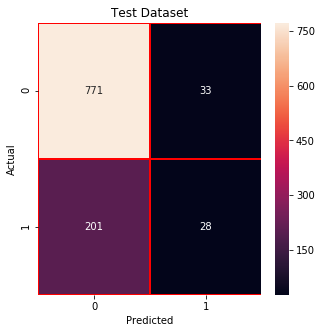

In [26]:
cm = confusion_matrix(y_test_1, y_pred1)
f , ax =  plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Test Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### Model Metrics

From the model metrics, the accuracy isn’t as good as the first model. This new model with under sampling is much better at predicting one outcomes. NPV and Specificity are both better than the first model. Also, the false negative rate is low, which shows that the model is not predicting a zero when it is actually a one at high rate. 

In [27]:
res_1

,Accuracy,NPV,PPV,Specificity,Sensitivity,F1 Score 1,F1 Score 0,False Negative Rate,False Postive Rate
0,0.773475,0.459016,0.79321,0.122271,0.958955,0.193103,0.868243,0.041045,0.877729


#### Roc Plot

The ROC plot and the AUC of this model is higher than the first model. An AUC of 0.70 isn’t great but still better than a random model.  

Text(0, 0.5, 'True Postive Rate')

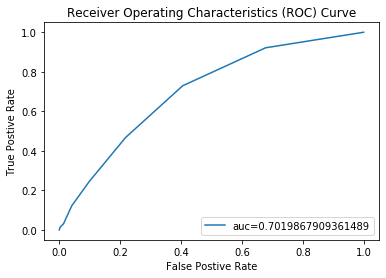

In [28]:
y_pred_proba2 = model1.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba2)
auc3 = auc(fpr,tpr)
#auc = roc_auc_score(y_test, y_pred_proba2)
plt.plot(fpr,tpr,label="auc="+str(auc3))
plt.legend(loc=4)
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')

### KNN with PCA

Since KNN doesn’t do well in high dimensional spaces PCA was used to lower the number of dimensions. Also, this was done using the under sampled data set.

In [29]:
from sklearn.decomposition import PCA 
pca = PCA(.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print('Dimensions before PCA:',X_train_scaled.shape[1])
print('Dimensions after PCA:',pca.n_components_)

Dimensions before PCA: 64
Dimensions after PCA: 21


#### Grid Search for K

A grid search was conducted to see what the best value for K is. The search used stratified K-fold cross validation to give the number for K that has the best accuracy.

In [30]:
params = {'n_neighbors' : [1,2,3,4,5,6,7,8,9]}
knn = KNeighborsClassifier()
gs3 = GridSearchCV(estimator=knn, scoring = 'accuracy',param_grid=params, cv = StratifiedKFold(n_splits = 5), n_jobs =1)
gs3.fit(X_train_pca, y_train_1)
print(gs3.best_params_)

{'n_neighbors': 8}


In [31]:
Score3 = pd.DataFrame(gs3.cv_results_)
Score3[['param_n_neighbors', 'mean_test_score']]

,param_n_neighbors,mean_test_score
0,1,0.707193
1,2,0.764592
2,3,0.737709
3,4,0.766045
4,5,0.756842
5,6,0.771858
6,7,0.764108
7,8,0.774764
8,9,0.768467


In [32]:
gs_best3 = gs3.best_estimator_
skf = StratifiedKFold(n_splits=5, random_state=0)
new_scores = cross_val_score(gs_best3, X_train_pca, y_train_1, cv=skf, scoring = 'accuracy')
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Cross-validation accuracy score (with optimized parameters) = 0.775 (+/- 0.00532)


In [33]:
model2 = KNeighborsClassifier( n_neighbors=8, metric='minkowski')
model2.fit(X_train_pca, y_train_1)
y_pred2 = model2.predict(X_test_pca)
res_2 = model_info(y_test_1, y_pred2)

#### Confusion Matrix

Like the first under sampled model this model also predicts one outcomes unlike the first model.

Text(24.0, 0.5, 'Actual')

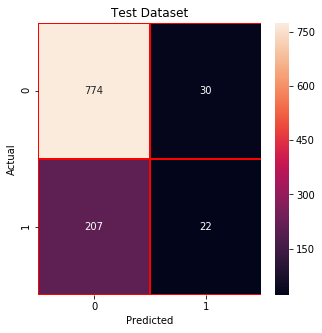

In [34]:
cm = confusion_matrix(y_test_1, y_pred2)
f , ax =  plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Test Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### Model Metrics 

Model metrics are very similar to the first under sample model. Conducting PCA didn’t have as big as an impact as expected. For the most part the metrics are around the same. 

In [35]:
res_2

,Accuracy,NPV,PPV,Specificity,Sensitivity,F1 Score 1,F1 Score 0,False Negative Rate,False Postive Rate
0,0.770571,0.423077,0.788991,0.09607,0.962687,0.156584,0.867227,0.037313,0.90393


#### ROC Plot

The ROC plot and AUC show that this model is pretty close to a model that is making a random guess. 

Text(0, 0.5, 'True Postive Rate')

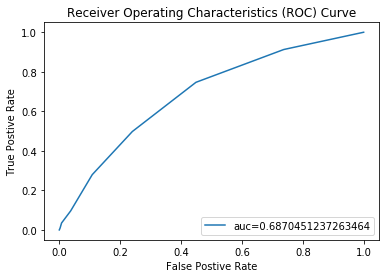

In [36]:
y_pred_proba3 = model2.predict_proba(X_test_pca)[::,1]
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba3)
auc4 = auc(fpr,tpr)
#auc = roc_auc_score(y_test, y_pred_proba3)
plt.plot(fpr,tpr,label="auc="+str(auc4))
plt.legend(loc=4)
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')

### RandomForest 

Using the whole data set.

#### Grid Search for max_depth and n_estimators

A grid search was done to find the best parameters for a random forest model using stratified K fold cross validation.  

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params = {'max_depth' : [3,6,8],'n_estimators':[250 ,350 ,500] }
gs5 = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy',
                   cv = StratifiedKFold(n_splits = 3, random_state=0), n_jobs =1)
gs5.fit(X_train, y_train)
print(gs5.best_params_)

{'max_depth': 8, 'n_estimators': 500}


In [38]:
Score4 = pd.DataFrame(gs5.cv_results_)
Score4[['param_max_depth', 'param_n_estimators', 'mean_test_score']]

,param_max_depth,param_n_estimators,mean_test_score
0,3,250,0.958278
1,3,350,0.958278
2,3,500,0.958278
3,6,250,0.958278
4,6,350,0.958324
5,6,500,0.958278
6,8,250,0.959280
7,8,350,0.959053
8,8,500,0.959508


In [39]:
gs_best5 = gs5.best_estimator_
skf = StratifiedKFold(n_splits=3, random_state=0)
new_scores = cross_val_score(gs_best5, X_train, y_train, cv=skf, scoring = 'accuracy')
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Cross-validation accuracy score (with optimized parameters) = 0.960 (+/- 0.00056)


In [40]:
model4 = RandomForestClassifier(max_depth=8, n_estimators=250, random_state=0)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
res_4 = model_info(y_test, y_pred4)

#### Confusion Matrix

The confusion matrix shows that this random forest model does not predict many one outcomes but the five times it did, the model was right more than wrong.

Text(24.0, 0.5, 'Actual')

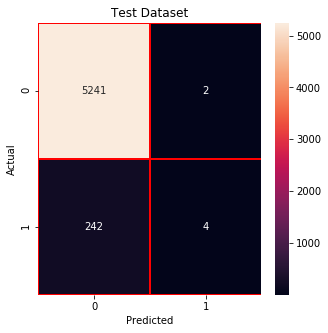

In [41]:
cm = confusion_matrix(y_test, y_pred4)
f , ax =  plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Test Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### Model Metrics

The model metrics show that the random forest model with the whole data set is better than the one using KNN. The random forest model is predicting more one outcomes unlike the KNN model. The specificity shows that when the outcome is actually one the model only gets it right 1% of the time. 

In [42]:
res_4

,Accuracy,NPV,PPV,Specificity,Sensitivity,F1 Score 1,F1 Score 0,False Negative Rate,False Postive Rate
0,0.955547,0.666667,0.955864,0.01626,0.999619,0.031746,0.977252,0.000381,0.98374


#### ROC Plots

The ROC plot and AUC both provide evidence that this model is much better than a random guess.

Text(0, 0.5, 'True Postive Rate')

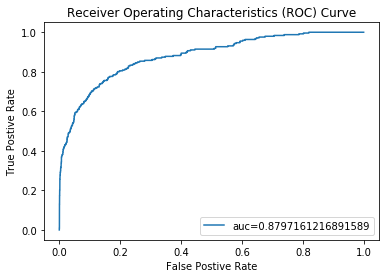

In [43]:
y_pred_proba4 = model4.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba4)
auc5 = auc(fpr,tpr)
#auc = roc_auc_score(y_test, y_pred_proba3)
plt.plot(fpr,tpr,label="auc="+str(auc5))
plt.legend(loc=4)
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')

#### RandomForest Under Sample

Random Forest conducted with same under sampling data from above. 

#### Grid Search for max_depth and n_estimators

A grid search was done to find the best parameters for a random forest model using stratified K – fold cross validation.

In [44]:
rf = RandomForestClassifier()
params = {'max_depth' : [3,6,8],'n_estimators':[250 ,350 ,500] }
gs6 = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy',
                   cv = StratifiedKFold(n_splits = 3, random_state=0), n_jobs =1)
gs6.fit(X_train_1, y_train_1)
print(gs6.best_params_)

{'max_depth': 8, 'n_estimators': 350}


In [45]:
Score5 = pd.DataFrame(gs6.cv_results_)
Score5[['param_max_depth', 'param_n_estimators', 'mean_test_score']]

,param_max_depth,param_n_estimators,mean_test_score
0,3,250,0.779123
1,3,350,0.779850
2,3,500,0.778639
3,6,250,0.826835
4,6,350,0.821991
5,6,500,0.823928
6,8,250,0.833616
7,8,350,0.837007
8,8,500,0.836280


In [46]:
gs_best6 = gs6.best_estimator_
skf = StratifiedKFold(n_splits=3, random_state=0)
new_scores = cross_val_score(gs_best6, X_train_1, y_train_1, cv=skf, scoring = 'accuracy')
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Cross-validation accuracy score (with optimized parameters) = 0.836 (+/- 0.00589)


In [47]:
model5 = RandomForestClassifier(max_depth=8, n_estimators=350, random_state=0)
model5.fit(X_train_1, y_train_1)
y_pred5 = model5.predict(X_test_1)
res_5 = model_info(y_test_1, y_pred5)

#### Confusion Matrix

The confusion matrix shows that this random forest model is predicting many more one outcomes than the first random forest model.

Text(24.0, 0.5, 'Actual')

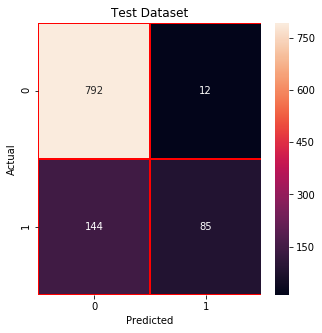

In [48]:
cm = confusion_matrix(y_test_1, y_pred5)
f , ax =  plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Test Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### Model Metrics

The model metrics show this model to be the best model out of all shown. The key metric that sticks out is the specificity of 37%, which is the best out of any model. This shows that this random forest model gets about 40% of the one outcomes right when it is actually a one. Doesn’t sound great but it is the best out of all models conducted. 

In [49]:
res_5

,Accuracy,NPV,PPV,Specificity,Sensitivity,F1 Score 1,F1 Score 0,False Negative Rate,False Postive Rate
0,0.848984,0.876289,0.846154,0.371179,0.985075,0.521472,0.910345,0.014925,0.628821


#### ROC Plot

The ROC plot and the AUC of .89 provide evidence that this model is the best model. 

Text(0, 0.5, 'True Postive Rate')

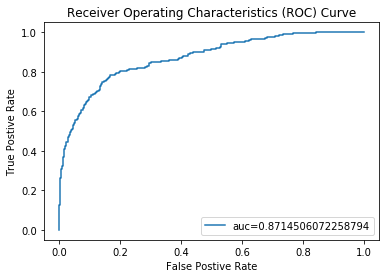

In [50]:
y_pred_proba5 = model5.predict_proba(X_test_1)[::,1]
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba5)
auc5 = auc(fpr,tpr)
#auc = roc_auc_score(y_test, y_pred_proba3)
plt.plot(fpr,tpr,label="auc="+str(auc5))
plt.legend(loc=4)
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')

### Results

In [51]:
res['Model'] = 'KNN no sample'
res_1['Model'] = 'KNN Under Sample'
res_2['Model'] = 'KNN Under Sample with PCA'
res_4['Model'] = 'RandomForest'
res_5['Model'] = 'RandomForest Under Sample'
df_all = pd.concat([res,res_1,res_2, res_4, res_5], axis = 0)
df_all = df_all.iloc[:,[9,0,1,2,3,4,5,6,7,8]]
df_all

,Model,Accuracy,NPV,PPV,Specificity,Sensitivity,F1 Score 1,F1 Score 0,False Negative Rate,False Postive Rate
0,KNN no sample,0.955183,0.000000,0.955183,0.000000,1.000000,0.000000,0.977078,0.000000,1.000000
0,KNN Under Sample,0.773475,0.459016,0.793210,0.122271,0.958955,0.193103,0.868243,0.041045,0.877729
0,KNN Under Sample with PCA,0.770571,0.423077,0.788991,0.096070,0.962687,0.156584,0.867227,0.037313,0.903930
0,RandomForest,0.955547,0.666667,0.955864,0.016260,0.999619,0.031746,0.977252,0.000381,0.983740
0,RandomForest Under Sample,0.848984,0.876289,0.846154,0.371179,0.985075,0.521472,0.910345,0.014925,0.628821
